In [1]:
import sys

sys.path.insert(1, '../src')

from ce import *
from ce.algorithms.greedy_heuristics import *
import random

random.seed(13)

# Greedy heuristics

**Nina Zukowska 148278, Antoni Solarski 148270**

## Algorithms

In [3]:
problem_instance_A_path = '../data/TSPA.csv'
problem_instance_B_path = '../data/TSPB.csv'
problem_instance_C_path = '../data/TSPC.csv'
problem_instance_D_path = '../data/TSPD.csv'

In [4]:
tspa, tspb, tspc, tspd = create_tsp(problem_instance_A_path), create_tsp(problem_instance_B_path), create_tsp(problem_instance_C_path), create_tsp(problem_instance_D_path)

### Random solution

The following pseudocode outlines a random solution generation algorithm for the Traveling Salesman Problem (TSP). The algorithm starts with an empty solution and iteratively selects random unvisited nodes until the desired solution length is reached.

```
# Function to get the next random unvisited node
function get_next_random_node(current_solution, tsp):
    allowable_nodes = [i for i in tsp.indexes if i not in current_solution]
    return random.sample(allowable_nodes, 1)[0]

# Random solution generation for TSP
function random_solution(tsp, with_debug=None):
    k = tsp.get_desired_solution_length()
    solution = []

    while len(solution) < k:
        current_node = get_next_random_node(solution, tsp)
        solution.append(current_node)

    return solution
```

In [5]:
debug = []

In [6]:
%%time
solution = random_solution(tspa, debug)

Wall time: 12.3 ms


In [ ]:
tspa.get_solution_cost(solution)

270963

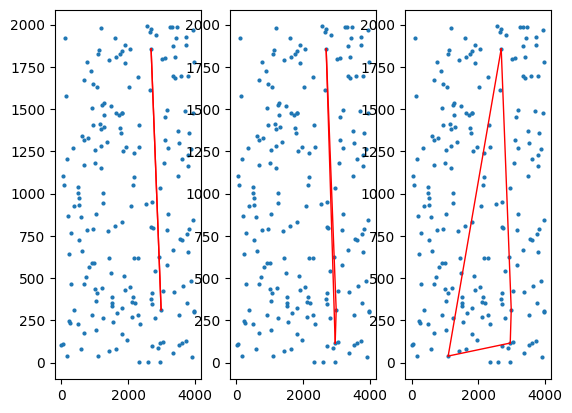

In [ ]:
tspa.plot(debug[2:5])

### Nearest neighbor

*description* - pseudocode ???

In [ ]:
debug = []

In [ ]:
%%time
solution = nearest_neighbor(tspa, 0, debug)

CPU times: total: 15.6 ms
Wall time: 11.7 ms


In [ ]:
tspa.get_solution_cost(solution)

120952

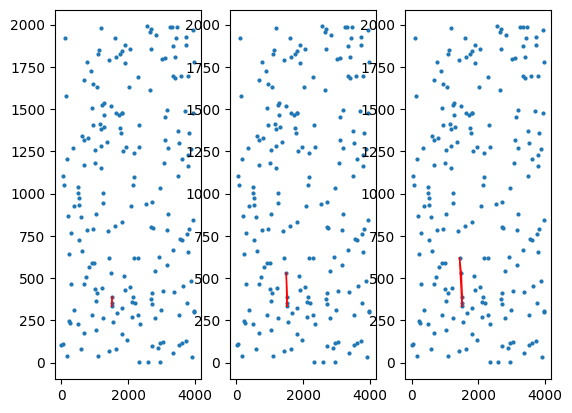

In [ ]:
tspa.plot(debug[2:5])

### Greedy cycle

*description* - pseudocode ???

In [ ]:
debug = []

In [ ]:
%%time
solution = greedy_cycle(tspa, 0, debug)

CPU times: total: 578 ms
Wall time: 551 ms


In [ ]:
tspa.get_solution_cost(solution)

91994

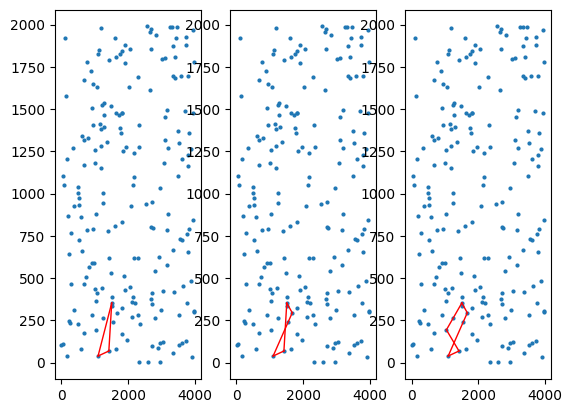

In [ ]:
tspa.plot(debug[2:5])

## Experiments

*TODO* description

In [ ]:
def experiment(runs, run_fn, cost_fn):
    results, best_solution, best_solution_cost = [], None, 1e9

    for i in range(runs):
        solution = run_fn(i)
        cost = cost_fn(solution)
        results.append(cost)
        if cost < best_solution_cost:
            best_solution = solution
            best_solution_cost = cost

    print(f'MIN {min(results)}, AVG {sum(results) / len(results)}, MAX {max(results)}')
    return results, best_solution

### Instance A

In [ ]:
tspa.plot()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspa), lambda x: tspa.get_solution_cost(x))

Random solution
MIN 236587, AVG 264935.945, MAX 290340
Wall time: 2.92 s


In [ ]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspa, x), lambda x: tspa.get_solution_cost(x))

Nearest neighbor
MIN 110035, AVG 116516.55, MAX 125805
CPU times: total: 1.66 s
Wall time: 1.66 s


In [ ]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspa, x), lambda x: tspa.get_solution_cost(x))

Greedy cycle
MIN 89827, AVG 92608.935, MAX 97131
CPU times: total: 1min 46s
Wall time: 1min 46s


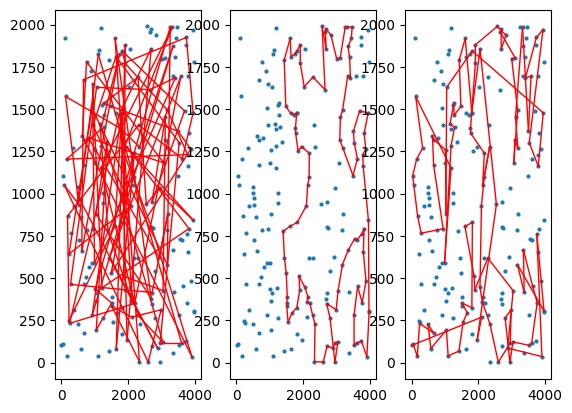

In [ ]:
tspa.plot([random_best, nn_best, gc_best])

### Instance B

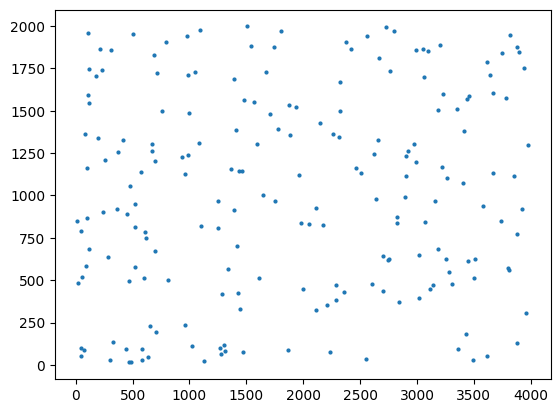

In [ ]:
tspb.plot()

In [ ]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspb), lambda x: tspb.get_solution_cost(x))

Random solution
MIN 239845, AVG 265712.225, MAX 299886
CPU times: total: 1.59 s
Wall time: 1.59 s


In [ ]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspb, x), lambda x: tspb.get_solution_cost(x))

Nearest neighbor
MIN 109047, AVG 116413.93, MAX 124759
CPU times: total: 1.7 s
Wall time: 1.71 s


In [ ]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspb, x), lambda x: tspb.get_solution_cost(x))

Greedy cycle


KeyboardInterrupt: 

In [ ]:
tspb.plot([random_best, nn_best, gc_best])

### Instance C

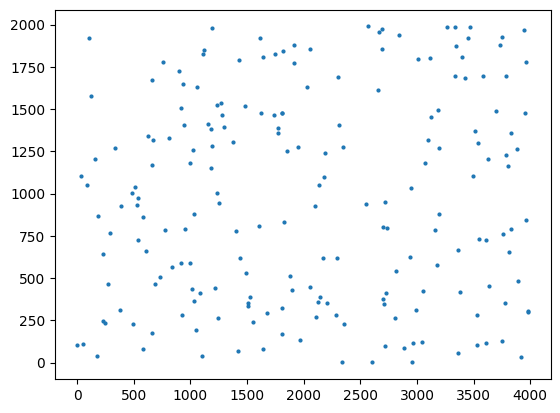

In [ ]:
tspc.plot()

In [ ]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspc), lambda x: tspc.get_solution_cost(x))

Random solution
MIN 191455, AVG 214811.975, MAX 237507
CPU times: total: 1.58 s
Wall time: 1.57 s


In [ ]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspc, x), lambda x: tspc.get_solution_cost(x))

Nearest neighbor
MIN 62629, AVG 66329.945, MAX 71814
CPU times: total: 1.78 s
Wall time: 1.77 s


In [ ]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspc, x), lambda x: tspc.get_solution_cost(x))

Greedy cycle
MIN 62887, AVG 66757.14, MAX 71118
CPU times: total: 1min 45s
Wall time: 1min 45s


In [ ]:
tspc.plot([random_best, nn_best, gc_best])

### Instance D

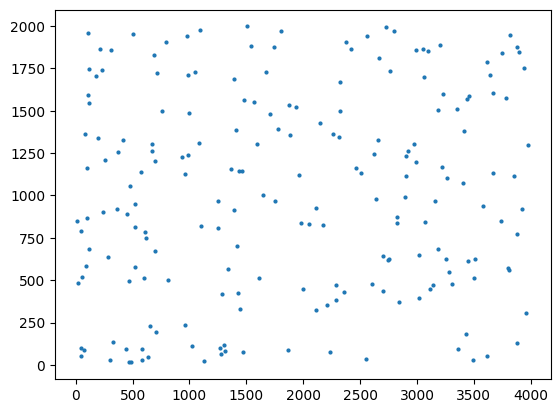

In [ ]:
tspd.plot()

In [ ]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspd), lambda x: tspd.get_solution_cost(x))

Random solution
MIN 196786, AVG 218974.615, MAX 241394
CPU times: total: 1.38 s
Wall time: 1.4 s


In [ ]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspd, x), lambda x: tspd.get_solution_cost(x))

Nearest neighbor
MIN 62967, AVG 67119.2, MAX 71396
CPU times: total: 1.61 s
Wall time: 1.58 s


In [ ]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspd, x), lambda x: tspd.get_solution_cost(x))

Greedy cycle


In [ ]:
tspd.plot([random_best, nn_best, gc_best])

## Conclusions

*TODO*